# Business Background
Automobile Insurance memberikan perlindungan finansial terhadap kerusakan fisik atau cedera tubuh akibat tabrakan lalu lintas, pencurian dan insiden lainnya terkait kendaraan.

# Problem :
Perusahaan ingin memberikan penawaran renewal asuransi kepada customernya. Namun menghubungi semua customer tentu menghabiskan cost yang lebih banyak sehingga diperlukan prediksi customer mana yang kira kira akan dihubungi dan setuju untuk melakukan pembaruan asuransi. Disamping itu, mempertahankan customer agar tetap berlangganan asuransi dalam jangka waktu yang lama lebih efektif dibandingkan dengan mencari customer baru.

# Goals :
- Mengurangi cost komunikasi
- Mempertahankan customer yang mengambil layanan asuransi mobil agar tetap menjadi nasabah
- Membangun model untuk memprediksi terkait ketertarikan customer untuk renewal Asuransi Kendaraan sehingga dapat membantu perusahaan dalam melakukan perencanaan terhadap strategi komunikasi.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data.csv", parse_dates = ['Effective To Date'], index_col = 0)

In [4]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [5]:
df.shape
#Dataset terdiri dari 9134 baris dan 23 kolom

(9134, 23)

- Customer Id

- State : Negara tempat customer tinggal

- CLV : nilai total pendapatan yang bisa didapatkan dari customer (jumlah total uang yang diharapkan customer untuk dibelanjakan dalam bisnis, atau produk, selama masa hidup mereka)

- Response : Respon terhadap tawaran

- Coverage : Basic, Extended, Premium

- Education : Level pendidikan

- Effective to Date : Tanggal polis berakhir

- Employment Status : Employed, Unemployed, Retired, Disabled, Medical Leave

- Gender : Male, Female

- Income : Customer's Annual Income

- Location Code : Rural, Suburban, Urban

- Marital Status : Single, Married, Divorced

- Monthly Premium Auto : Jumlah pembayaran asuransi bulanan

- Months Since Last Claim : Jumlah bulan klaim asuransi terakhir

- Months Since Policy Inception : Jumlah bulan sejak memulai polis asuransi

- Number of Open Complaints : Jumlah complaint yang belum diselesaikan

- Number of Policies : Jumlah policy yang dimiliki customer saat ini

- Policy Type : Corporate Auto, Personal Auto, Special Auto

- Policy : Level 1, level 2, level 3

- Renew Offer Type : 4 tipe penawaran pembaruan (Offer 1, Offer 2, Offer 3, Offer 4)

- Sales Channel : Channel untuk membeli policy (Agent, Branch, Call Center, Web)

- Total Claim Amount : Jumlah kumulatif klaim sejak dimulainya polis

- Vehicle Class : 4-Door, Luxury, Luxury SUV, Sports Car, SUV, 2-Door

- Vehicle Size: Large, Midsize, Small

In [6]:
df.isna().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9134 entries, BU79786 to Y167826
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   State                          9134 non-null   object        
 1   Customer Lifetime Value        9134 non-null   float64       
 2   Response                       9134 non-null   object        
 3   Coverage                       9134 non-null   object        
 4   Education                      9134 non-null   object        
 5   Effective To Date              9134 non-null   datetime64[ns]
 6   EmploymentStatus               9134 non-null   object        
 7   Gender                         9134 non-null   object        
 8   Income                         9134 non-null   int64         
 9   Location Code                  9134 non-null   object        
 10  Marital Status                 9134 non-null   object        
 11  Monthly Premi

In [8]:
df.describe().T.round(2)
#Range clv adalah ~1.900 sampai ~85.000 dollar
#Range income adalah 0 - ~100.000 dollar
#Premi yang dibayar oleh customer adalah 61 - ~300 dollar perbulan nya
#Ada customer yang baru membeli polis dan ada yang sudah lebih dari 8 tahun
#Range open complaint adalah 0 - 5 complaint per customer
#Jumlah policy yang dibeli oleh customer berkisar 1 - 9 polis

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.94,6870.97,1898.01,3994.25,5780.18,8962.17,83325.38
Income,9134.0,37657.38,30379.90,0.00,0.00,33889.50,62320.00,99981.00
Monthly Premium Auto,9134.0,93.22,34.41,61.00,68.00,83.00,109.00,298.00
Months Since Last Claim,9134.0,15.10,10.07,0.00,6.00,14.00,23.00,35.00
Months Since Policy Inception,9134.0,48.06,27.91,0.00,24.00,48.00,71.00,99.00
Number of Open Complaints,9134.0,0.38,0.91,0.00,0.00,0.00,0.00,5.00
Number of Policies,9134.0,2.97,2.39,1.00,1.00,2.00,4.00,9.00
Total Claim Amount,9134.0,434.09,290.50,0.10,272.26,383.95,547.51,2893.24


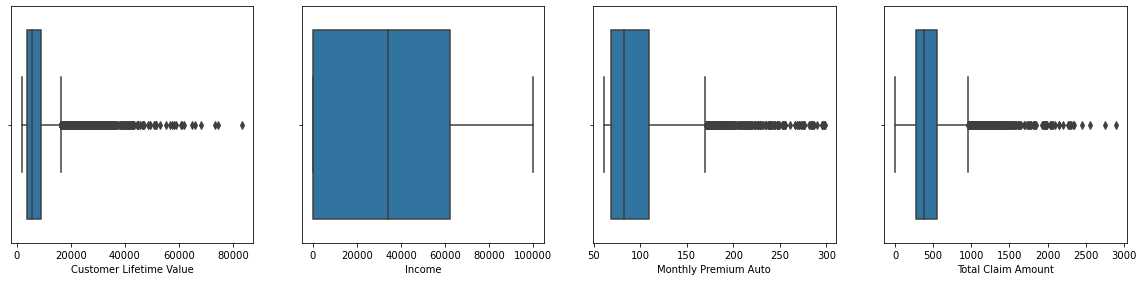

In [9]:
df_describe = df.drop(columns = ['State', 'Response', 'Coverage','Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size'])

plt.figure(figsize =(20, 20))
x = 1 

for column in df_describe.columns:
    plt.subplot(4,4,x)
    sns.boxplot(df_describe[column])
    x+=1
plt.tight_layout
plt.show()

# Tidak dilakukan penghapusan outlier karena pada real case, variabel dibawah memiliki nilai yang bervariasi

In [10]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique(), "\n")

State :
['Washington' 'Arizona' 'Nevada' 'California' 'Oregon'] 

Customer Lifetime Value :
[ 2763.519279  6979.535903 12887.43165  ...  8163.890428  7524.442436
  2611.836866] 

Response :
['No' 'Yes'] 

Coverage :
['Basic' 'Extended' 'Premium'] 

Education :
['Bachelor' 'College' 'Master' 'High School or Below' 'Doctor'] 

Effective To Date :
['2011-02-24T00:00:00.000000000' '2011-01-31T00:00:00.000000000'
 '2011-02-19T00:00:00.000000000' '2011-01-20T00:00:00.000000000'
 '2011-02-03T00:00:00.000000000' '2011-01-25T00:00:00.000000000'
 '2011-01-18T00:00:00.000000000' '2011-01-26T00:00:00.000000000'
 '2011-02-17T00:00:00.000000000' '2011-02-21T00:00:00.000000000'
 '2011-01-06T00:00:00.000000000' '2011-02-06T00:00:00.000000000'
 '2011-01-10T00:00:00.000000000' '2011-01-17T00:00:00.000000000'
 '2011-01-05T00:00:00.000000000' '2011-02-27T00:00:00.000000000'
 '2011-01-14T00:00:00.000000000' '2011-01-21T00:00:00.000000000'
 '2011-02-05T00:00:00.000000000' '2011-01-29T00:00:00.000000000'
 '2

## Data Preparation

#### Cek Nilai Total Claim Amount

In [11]:
#ada claim yang < 10 dollar?
less_than_10 = df[df['Total Claim Amount'] < 10]
less_than_10

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
HG65722,Oregon,12819.102890,No,Premium,Doctor,2011-01-25,Disabled,F,10105,Rural,...,4,3,3,Personal Auto,Personal L2,Offer1,Branch,0.517753,SUV,Medsize
MO91628,Oregon,2614.474305,No,Basic,Master,2011-02-11,Employed,M,65186,Rural,...,27,0,1,Personal Auto,Personal L2,Offer2,Web,5.434505,Two-Door Car,Large
RB50392,Washington,7838.068321,No,Basic,Master,2011-02-17,Unemployed,F,0,Rural,...,12,0,2,Personal Auto,Personal L1,Offer2,Agent,2.704934,Four-Door Car,Medsize
BS77946,Arizona,9753.307106,No,Extended,Bachelor,2011-02-24,Medical Leave,F,17514,Rural,...,5,0,3,Personal Auto,Personal L1,Offer1,Branch,8.312729,SUV,Medsize
EW38459,Nevada,2567.151468,No,Basic,Bachelor,2011-02-20,Employed,F,40864,Rural,...,75,0,1,Corporate Auto,Corporate L1,Offer2,Web,9.515280,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NM33351,California,35186.256110,No,Extended,Bachelor,2011-02-26,Employed,F,86134,Rural,...,78,0,2,Corporate Auto,Corporate L3,Offer1,Agent,3.246203,Two-Door Car,Small
TS53731,California,8660.838974,No,Basic,College,2011-02-20,Employed,F,79674,Rural,...,50,0,3,Personal Auto,Personal L2,Offer3,Call Center,9.275859,SUV,Medsize
HE85298,California,4384.348683,No,Basic,High School or Below,2011-01-07,Employed,F,32272,Rural,...,5,0,1,Corporate Auto,Corporate L3,Offer2,Branch,6.342791,SUV,Medsize


In [12]:
len(less_than_10)

89

In [13]:
df.drop(df[df['Total Claim Amount'] < 10].index, inplace = True)

In [14]:
df[df['Total Claim Amount'] < 10]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,


#### Melakukan pengecekan apakah ada customer yang bekerja tetapi income = 0

In [15]:
con1 = df['Income'] == 0
con2 = df['EmploymentStatus'] == 'Employed'
df[con1 & con2]

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,


#### Binning Income, Total Claim Amout dan Customer Lifetime Value

In [16]:
df['Income'].max()

99981

In [17]:
value_bin = [-1, 25000, 50000, df['Income'].max()]
label_bin = ['Low Income', 'Medium Income', 'High Income']

df['Income_group'] = pd.cut(df['Income'], bins = value_bin, labels = label_bin)

In [18]:
df['Total Claim Amount'].max()

2893.239678

In [19]:
df['Total Claim Amount'].median()

386.765125

In [20]:
value_bin = [0, 400, 1500, df['Total Claim Amount'].max()]
label_bin = ['up to 400 ','up to 1500', 'more than 1500']

df['Claim_group'] = pd.cut(df['Total Claim Amount'], bins = value_bin, labels = label_bin)

In [21]:
df['Customer Lifetime Value'].min()

1898.007675

In [22]:
df['Customer Lifetime Value'].median()

5790.462518

In [23]:
df['Customer Lifetime Value'].max()

83325.38119

In [24]:
value_bin = [0, 6000, 30000, df['Customer Lifetime Value'].max()]
label_bin = ['up to 6.000','up to 30.000', 'more than 30.000']

df['clv_group'] = pd.cut(df['Customer Lifetime Value'], bins = value_bin, labels = label_bin)

In [25]:
df['Monthly Premium Auto'].min()

61

In [26]:
df['Monthly Premium Auto'].median()

83.0

In [27]:
df['Monthly Premium Auto'].max()

298

In [28]:
value_bin = [0, 85, 150, df['Monthly Premium Auto'].max()]
label_bin = ['0 - 85 dollar','85 - 150 dollar', 'more than 150']

df['premi_group'] = pd.cut(df['Monthly Premium Auto'], bins = value_bin, labels = label_bin)

In [29]:
value_bin = [0, 3, 6, df['Number of Policies'].max()]
label_bin = ['Low','Medium', 'High']

df['numpolicy_group'] = pd.cut(df['Number of Policies'], bins = value_bin, labels = label_bin)

In [30]:
df.head()

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Income_group,Claim_group,clv_group,premi_group,numpolicy_group
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,...,Offer1,Agent,384.811147,Two-Door Car,Medsize,High Income,up to 400,up to 6.000,0 - 85 dollar,Low
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,...,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Low Income,up to 1500,up to 30.000,85 - 150 dollar,High
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,...,Offer1,Agent,566.472247,Two-Door Car,Medsize,Medium Income,up to 1500,up to 30.000,85 - 150 dollar,Low
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,...,Offer1,Call Center,529.881344,SUV,Medsize,Low Income,up to 1500,up to 30.000,85 - 150 dollar,High
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,...,Offer1,Agent,138.130879,Four-Door Car,Medsize,Medium Income,up to 400,up to 6.000,0 - 85 dollar,Low


In [31]:
df.to_csv('data_clean.csv')

Hipotesis : 
- Customer yang memiliki pekerjaan dan / atau yang sudah menikah akan tertarik melakukan renewal
- Customer yang sudah menikah memiliki pembayaran premi lebih rendah
- **Premi customer di perkotaan lebih tinggi**
- Customer di perkotaan memiliki claim amount yang tinggi
- **Customer di perkotaan akan tertarik melakukan renewal**
- Customer pria rata - rata membayar premi lebih mahal dibandingkan wanita
- Customer dengan premium coverage membayar premi lebih tinggi
- Special auto policy memiliki customer dengan rata - rata income menengah kebawah dan premi yang rendah
- Orang yang berpendidikan lebih rendah lebih beresiko sehingga lebih banyak melakukan claim

In [32]:
def without_hue(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()

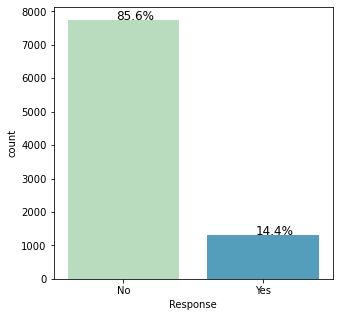

In [33]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(df['Response'], palette = 'GnBu')
without_hue(ax, df['Response'])

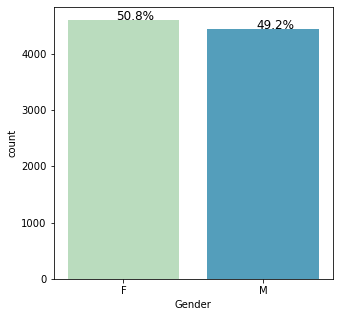

In [34]:
plt.figure(figsize = (5, 5))
ax = sns.countplot(df['Gender'], palette = 'GnBu')
without_hue(ax, df['Gender'])

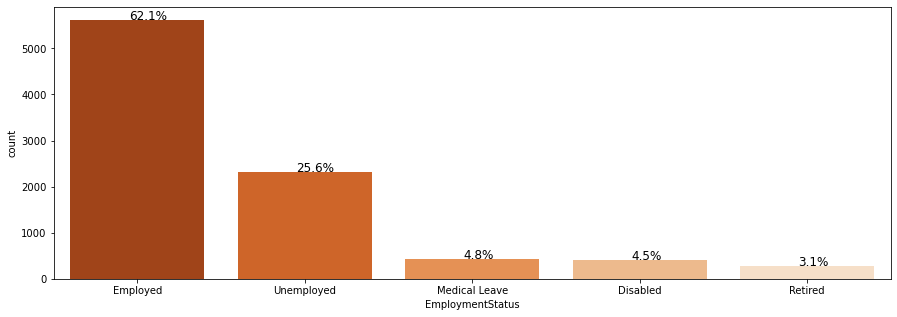

In [35]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(df['EmploymentStatus'], palette = 'Oranges_r')
without_hue(ax, df['EmploymentStatus'])
#Melihat jumlah customer berdasarkan employment status

In [36]:
a = ((pd.crosstab(index = df['EmploymentStatus'], columns = df['Response'], normalize = "columns"))*100).round(2)
a.sort_values('Yes', ascending = False)

Response,No,Yes
EmploymentStatus,,
Employed,62.86,57.60
Retired,1.01,15.67
Unemployed,27.30,15.21
Medical Leave,4.55,5.99
Disabled,4.29,5.53


In [37]:
a = ((pd.crosstab(index = df['Location Code'], columns = df['Response'], normalize = "index"))*100).round(2)
a.sort_values('Yes', ascending = False)

Response,No,Yes
Location Code,,
Suburban,82.56,17.44
Rural,90.74,9.26
Urban,91.28,8.72


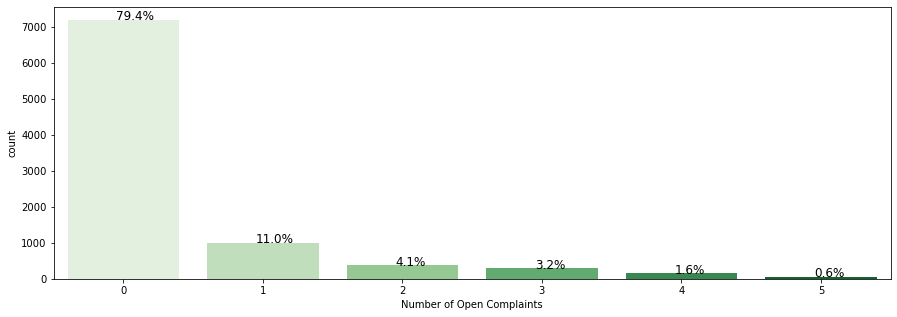

In [38]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(df['Number of Open Complaints'], palette = 'Greens')
without_hue(ax, df['Number of Open Complaints'])
# ~21% customer yang memiliki complaint yang belum dihandle

In [39]:
a = ((pd.crosstab(index = df['Number of Open Complaints'], columns = df['Response'], normalize = "index"))*100).round(2)
a.sort_values('Yes', ascending = False)

Response,No,Yes
Number of Open Complaints,,
3,81.18,18.82
4,83.89,16.11
0,85.30,14.70
1,86.19,13.81
5,89.29,10.71
2,93.51,6.49


In [40]:
a = ((pd.crosstab(index = df['Months Since Last Claim'], columns = df['Response'], normalize = "index"))*100).round(2)
a.sort_values('Yes', ascending = False).head(10)

Response,No,Yes
Months Since Last Claim,,
16,77.40,22.60
3,77.89,22.11
10,80.13,19.87
1,80.65,19.35
18,81.50,18.50
21,81.90,18.10
28,82.09,17.91
25,82.13,17.87
23,82.13,17.87


In [41]:
a = ((pd.crosstab(index = df['Months Since Policy Inception'], columns = df['Response'], normalize = "index"))*100).round(2)
a.sort_values('Yes', ascending = False).head(10)

Response,No,Yes
Months Since Policy Inception,,
59,66.20,33.80
56,67.57,32.43
43,72.22,27.78
93,72.73,27.27
3,73.68,26.32
54,74.19,25.81
94,75.00,25.00
50,75.61,24.39
83,76.00,24.00


In [42]:
a = ((pd.crosstab(index = df['Policy Type'], columns = df['Response'], normalize = "columns"))*100).round(2)
a.sort_values('Yes', ascending = False)

Response,No,Yes
Policy Type,,
Personal Auto,74.57,73.27
Corporate Auto,21.37,21.97
Special Auto,4.06,4.76


In [43]:
a = ((pd.crosstab(index = df['Policy'], columns = df['Response'], normalize = "columns"))*100).round(2)
a.sort_values('Yes', ascending = False)

Response,No,Yes
Policy,,
Personal L3,37.80,35.87
Personal L2,23.27,23.27
Personal L1,13.50,14.13
Corporate L3,10.94,11.67
Corporate L2,6.47,6.61
Corporate L1,3.96,3.69
Special L3,1.51,2.38
Special L2,1.85,1.46
Special L1,0.70,0.92


In [44]:
((pd.crosstab(index = df['Renew Offer Type'], columns = df['Response'], normalize = 'columns'))*100).round(2)
#Offer 1 dan offer 2 lebih menarik bagi customer

Response,No,Yes
Renew Offer Type,,
Offer1,40.49,45.62
Offer2,28.48,52.07
Offer3,17.96,2.30
Offer4,13.07,0.00


In [45]:
((pd.crosstab(index = df['Vehicle Class'], columns = df['Response'], normalize = 'columns'))*100).round(2)
#Lebih banyak customer dengan mobil standar (4 pintu) yang melakukan renewal

Response,No,Yes
Vehicle Class,,
Four-Door Car,51.00,47.93
Luxury Car,1.95,0.92
Luxury SUV,1.98,2.30
SUV,19.29,22.12
Sports Car,5.06,6.91
Two-Door Car,20.72,19.82


### Hipotesis 1 : Customer yang memiliki pekerjaan dan / atau yang sudah menikah akan tertarik melakukan renewal

In [46]:
((pd.crosstab(index = df['EmploymentStatus'], columns = df['Response'], normalize = 'columns'))*100).round(2)
#Employed customer lebih tertarik untuk melakukan renewal

Response,No,Yes
EmploymentStatus,,
Disabled,4.29,5.53
Employed,62.86,57.60
Medical Leave,4.55,5.99
Retired,1.01,15.67
Unemployed,27.30,15.21


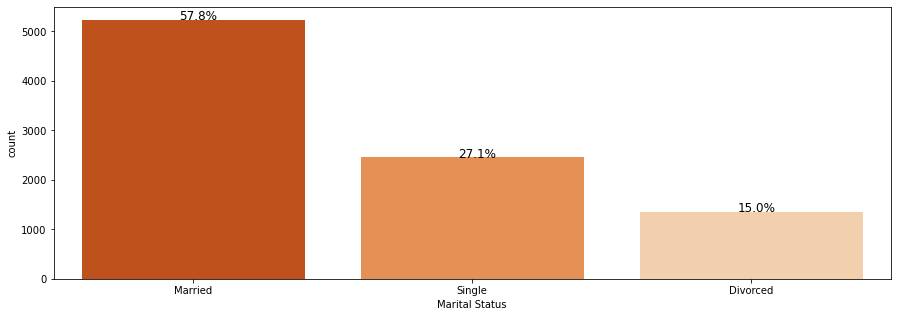

In [47]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(df['Marital Status'], palette = 'Oranges_r')
without_hue(ax, df['Marital Status'])

In [48]:
((pd.crosstab(index = df['Marital Status'], columns = df['Response'], normalize = 'columns'))*100).round(3)
#Married customer lebih tertarik untuk melakukan renewal

Response,No,Yes
Marital Status,,
Divorced,13.354,24.885
Married,58.659,52.995
Single,27.987,22.120


In [49]:
me_2 = ((pd.crosstab(index = [df['Marital Status'], df['EmploymentStatus']], columns = df['Response'], normalize = 'columns'))*100).round(2)
me_2.sort_values('Yes', ascending = False).head(10)
#Customer yang memiliki pekerjaan marital status apapun terutama married lebih banyak tertarik untuk renewal

Response                            No    Yes
Marital Status EmploymentStatus              
Married        Employed          43.50  33.64
Single         Employed           9.92  12.44
Divorced       Employed           9.44  11.52
Married        Unemployed         8.67   7.83
               Retired            0.41   6.45
Divorced       Retired            0.37   5.99
               Unemployed         2.03   3.69
Single         Unemployed        16.61   3.69
               Retired            0.22   3.23
Divorced       Disabled           0.80   2.76

### Hipotesis 2 : Customer yang sudah menikah memiliki pembayaran premi lebih rendah

In [50]:
def remove_outliers(columns) :
    Q1 = df.describe()[f'{columns}']['25%']
    Q3 = df.describe()[f'{columns}']['75%']
    IQR = Q3 - Q1
    Upper_Fence = Q3 + (1.5 * IQR)
    Lower_Fence = Q1 - (1.5 * IQR)
    df.drop(df[(df[f'{columns}'] < Lower_Fence) | (df[f'{columns}'] > Upper_Fence)].index)
    mean = df[f'{columns}'].mean()
    print(f"Mean {columns} = {mean}")
    return df

In [51]:
remove_outliers('Monthly Premium Auto')
pd.crosstab(index = df['Marital Status'], columns = 'mean', values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('mean', ascending=False).round(1)
#Married customer memiliki premi yang lebih rendah daripada single customer
#Tetapi preminya lebih tinggi daripada divorced customer

Mean Monthly Premium Auto = 93.30757324488668


col_0,mean
Marital Status,
Single,94.0
Married,93.2
Divorced,92.7


In [52]:
((pd.crosstab(index = [df['Marital Status'], df['numpolicy_group']], columns = 'count', normalize = 'columns'))*100).round(2)
#Married customer membeli lebih banyak policy daripada divorced customer sehingga premi dapat lebih tinggi

col_0                           count
Marital Status numpolicy_group       
Divorced       Low              11.54
               Medium            1.63
               High              1.85
Married        Low              42.10
               Medium            7.69
               High              8.05
Single         Low              19.87
               Medium            3.64
               High              3.64

### Hipotesis 3 : Premi customer di perkotaan lebih tinggi

In [53]:
remove_outliers('Monthly Premium Auto')
pd.crosstab(index = df['Location Code'], columns = 'premi', values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('premi', ascending=False).round()
#Suburban membayar premi lebih tinggi

Mean Monthly Premium Auto = 93.30757324488668


col_0,premi
Location Code,
Suburban,95.0
Rural,90.0
Urban,90.0


In [54]:
remove_outliers('Monthly Premium Auto')
pd.crosstab(index = df['Vehicle Class'], columns = 'premi', values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('premi', ascending=False).round()
#Luxury car dengan size apapun lebih memiliki rata - rata pembayaran premi yang tinggi

Mean Monthly Premium Auto = 93.30757324488668


col_0,premi
Vehicle Class,
Luxury SUV,213.0
Luxury Car,212.0
Sports Car,122.0
SUV,120.0
Four-Door Car,77.0
Two-Door Car,77.0


In [55]:
((pd.crosstab(index = [df['Location Code']], columns = df['Vehicle Class'], normalize = "columns"))*100).round(2)
#Suburban memiliki lebih banyak customer yang memiliki luxury car

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Location Code,,,,,,
Rural,19.64,11.04,12.02,16.05,20.75,19.33
Suburban,62.39,77.91,76.50,65.94,64.52,63.00
Urban,17.98,11.04,11.48,18.01,14.73,17.67


### Hipotesis 4 : Customer di perkotaan memiliki claim amount yang tinggi

In [56]:
df[df['Total Claim Amount'] == 0]
# Semua customer pernah melakukan claim

,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Income_group,Claim_group,clv_group,premi_group,numpolicy_group
Customer,,,,,,,,,,,,,,,,,,,,,


In [57]:
remove_outliers('Total Claim Amount')
pd.crosstab(index = [df['Claim_group'], df['Location Code']], columns = 'claim', values = df['Total Claim Amount'], aggfunc = 'mean').sort_values('claim', ascending=False).round()
#Customer di suburban melakukan claim dengan jumlah yang jauh diatas rata - rata
#Urban (perkotaan) juga termasuk location code dengan total claim amount di atas rata - rata

Mean Total Claim Amount = 438.30725752481754


col_0                          claim
Claim_group    Location Code        
more than 1500 Suburban       1889.0
up to 1500     Suburban        643.0
               Urban           511.0
               Rural           465.0
up to 400      Suburban        337.0
               Urban           277.0
               Rural           113.0

### Hipotesis 5 : Customer di perkotaan akan tertarik melakukan renewal

In [58]:
lc = ((pd.crosstab(index = df['Location Code'], columns = df['Response'], normalize = 'columns'))*100).round(3)
lc.sort_values("Yes", ascending = False)
#Customer di suburban lebih banyak tertarik untuk melakukan renewal

Response,No,Yes
Location Code,,
Suburban,61.617,77.419
Rural,19.734,11.982
Urban,18.649,10.599


### Hipotesis 6 : Customer pria rata - rata membayar premi lebih mahal dibandingkan wanita

In [59]:
remove_outliers('Monthly Premium Auto')
pd.crosstab(index = df['Gender'], columns = 'avg_premi', values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('avg_premi', ascending=False).round(3)
#Customer Male membayar premi lebih tinggi daripada Female

Mean Monthly Premium Auto = 93.30757324488668


col_0,avg_premi
Gender,
M,93.446
F,93.174


### Hipotesis 7 : Customer dengan premium coverage membayar premi lebih tinggi

In [60]:
remove_outliers('Monthly Premium Auto')
(pd.crosstab(index = df['Coverage'], columns = 'premi', values = df['Monthly Premium Auto'], aggfunc = "mean")).round(2)

Mean Monthly Premium Auto = 93.30757324488668


col_0,premi
Coverage,
Basic,82.22
Extended,103.69
Premium,133.44


### Hipotesis 8 : Special auto policy memiliki customer dengan rata - rata income menengah kebawah dan premi yang rendah

In [61]:
((pd.crosstab(index = df['Policy Type'], columns = df['Income_group'], normalize = 'index'))*100).round(2)
#Customer yang memiliki special auto policy lebih dominan memiliki low income dan high income

Income_group,Low Income,Medium Income,High Income
Policy Type,,,
Corporate Auto,39.00,25.55,35.45
Personal Auto,38.88,25.65,35.46
Special Auto,38.03,24.47,37.50


In [62]:
remove_outliers('Monthly Premium Auto')
pd.crosstab(index = [df['Policy Type']], columns = 'premi', values = df['Monthly Premium Auto'], aggfunc = 'mean').sort_values('premi', ascending=False).round(2)
#Customer dengan special auto policy memiliki pembayaran premi lebih rendah

Mean Monthly Premium Auto = 93.30757324488668


col_0,premi
Policy Type,
Corporate Auto,93.38
Personal Auto,93.30
Special Auto,93.06


### Hipotesis 9 : Orang yang berpendidikan lebih rendah lebih beresiko sehingga lebih banyak melakukan claim

In [63]:
remove_outliers('Total Claim Amount')
pd.crosstab(index = df['Education'], columns = 'mean', values = df['Total Claim Amount'], aggfunc = 'mean').sort_values('mean', ascending=False).round(2)
#Orang yang pendidikan terakhir high school atau dibawahnya memiliki resiko dalam berkendara lebih tinggi sehingga akan lebih banyak melakukan claim
#Nilai claim juga diatas rata - rata total claim

Mean Total Claim Amount = 438.30725752481754


col_0,mean
Education,
High School or Below,491.08
Bachelor,432.03
College,427.90
Master,354.49
Doctor,345.16


# ------------

#### Response by State and CLV

In [64]:
remove_outliers('Customer Lifetime Value')
yes = df[df['Response'] == 'Yes']
pd.crosstab(index = [yes['State'], yes['Response']], columns = 'clv', values = yes['Customer Lifetime Value'], aggfunc = 'mean').sort_values('clv', ascending=False).round()

Mean Customer Lifetime Value = 8018.107353709995


,col_0,clv
State,Response,
Oregon,Yes,8017.0
Arizona,Yes,8014.0
California,Yes,7930.0
Washington,Yes,7761.0
Nevada,Yes,6878.0


#### Response by Location Code and CLV

In [65]:
remove_outliers('Customer Lifetime Value')
yes = df[df['Response'] == 'Yes']
pd.crosstab(index = [yes['Location Code'], yes['Response']], columns = 'clv', values = yes['Customer Lifetime Value'], aggfunc = 'mean').sort_values('clv', ascending=False).round()
#Customer yang merespon yes di suburban memiliki rata - rata clv diatas nilai rata - rata

Mean Customer Lifetime Value = 8018.107353709995


,col_0,clv
Location Code,Response,
Suburban,Yes,8138.0
Urban,Yes,7179.0
Rural,Yes,6637.0


#### Response by Location Code dan Income Group

In [66]:
lc_ig = ((pd.crosstab(index = [df['Location Code'], df['Income_group']], columns = df['Response'], normalize = "columns"))*100).round(2)
lc_ig.sort_values('Yes', ascending = False)
#Customer di suburban dengan low, medium dan high income lebih banyak tertarik untuk renewal
#Customer di rural dengan low income tidak ada yang ingin melakukan renewal

Response                        No    Yes
Location Code Income_group               
Suburban      Low Income     34.07  37.79
              Medium Income  14.26  20.28
              High Income    13.29  19.35
Urban         High Income    10.73   8.29
Rural         High Income    11.53   7.83
              Medium Income   5.63   4.15
Urban         Medium Income   5.58   1.84
              Low Income      2.34   0.46
Rural         Low Income      2.57   0.00

#### Response Per Sales Channel

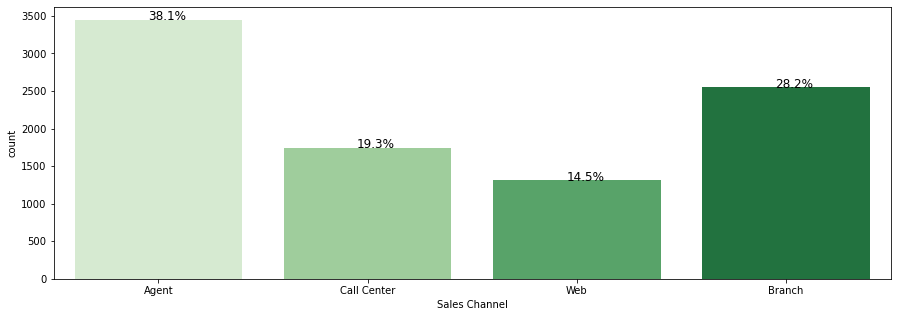

In [67]:
plt.figure(figsize = (15, 5))
ax = sns.countplot(df['Sales Channel'], palette = 'Greens')
without_hue(ax, df['Sales Channel'])

In [68]:
((pd.crosstab(index = [df['Sales Channel']], columns = df['Response'], normalize = 'columns'))*100).round(2)
#Pembelian polis melalui agent tetap menjadi favorit customer
#Seorang agent dapat memberikan edukasi dan pendekatan yang baik kepada customer

Response,No,Yes
Sales Channel,,
Agent,35.89,51.15
Branch,29.10,22.58
Call Center,20.12,14.29
Web,14.89,11.98


#### Response Per State dan Coverage

In [69]:
sc = ((pd.crosstab(index = [df['State'], df['Coverage']], columns = df['Response'], normalize = 'columns'))*100).round(2)
sc.sort_values('Yes', ascending = False).head(10)
#Customer di seluruh state lebih tertarik untuk renewal basic coverage

,Response,No,Yes
State,Coverage,,
California,Basic,20.87,21.74
Oregon,Basic,17.58,16.67
Arizona,Basic,11.43,11.37
California,Extended,10.53,9.60
Oregon,Extended,8.27,9.52
Nevada,Basic,5.62,5.91
Washington,Basic,5.33,5.61
Arizona,Extended,5.68,5.30
California,Premium,3.05,3.46


#### Response per Income Group dan Renew Offer Type

In [70]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['Income_group'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)
#Customer low income lebih banyak tertarik untuk renewal ketika ditawari offer 1
#Customer high income lebih banyak tertarik untuk renewal ketika ditawari offer 2 dan 3
#Offer 3 dan 4 bisa dihapus (tidak valuable) dan fokus pada offer 1 dan 2 sesuai dengan income group customer

,Renew Offer Type,Offer1,Offer2,Offer3
Income_group,Response,,,
Low Income,Yes,66.27,33.73,0.00
Medium Income,Yes,42.11,56.14,1.75
High Income,Yes,25.97,68.83,5.19


#### Karakteristik customer berdasarkan Offer Type

In [71]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['Vehicle Class'], yes['Vehicle Size'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)

Renew Offer Type                     Offer1  Offer2  Offer3
Vehicle Class Vehicle Size Response                        
Four-Door Car Large        Yes        50.00   50.00    0.00
              Medsize      Yes        42.47   53.42    4.11
              Small        Yes        35.29   58.82    5.88
Luxury Car    Medsize      Yes         0.00  100.00    0.00
              Small        Yes       100.00    0.00    0.00
Luxury SUV    Medsize      Yes        75.00   25.00    0.00
              Small        Yes         0.00  100.00    0.00
SUV           Large        Yes        50.00   50.00    0.00
              Medsize      Yes        61.11   38.89    0.00
              Small        Yes        50.00   50.00    0.00
Sports Car    Large        Yes       100.00    0.00    0.00
              Medsize      Yes        38.46   61.54    0.00
Two-Door Car  Large        Yes        16.67   83.33    0.00
              Medsize      Yes        43.33   56.67    0.00
              Small        Yes        28.57   57.14   14.29

#### Offer 1 :
- Four-Door Car (Large)
- Luxury Car (Small)
- Luxury SUV (Med)
- SUV (Large, Med, Small)
- Sport Car (Large)

#### Offer 2 :
- Four-Door Car (Large, Med, Small)
- Luxury Car (Med)
- Luxury SUV (Small)
- SUV (Large, Small)
- Sport Car (Med)
- Two-Door Car (Large, Med, Small)

In [72]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['EmploymentStatus'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
EmploymentStatus,Response,,,
Disabled,Yes,75.00,25.00,0.00
Employed,Yes,30.40,66.40,3.20
Medical Leave,Yes,53.85,46.15,0.00
Retired,Yes,67.65,29.41,2.94
Unemployed,Yes,66.67,33.33,0.00


- Offer 1 : Disabled, Medical Leave, Retired, Unemployed
- Offer 2 : Employed

In [73]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['Income_group'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
Income_group,Response,,,
Low Income,Yes,66.27,33.73,0.00
Medium Income,Yes,42.11,56.14,1.75
High Income,Yes,25.97,68.83,5.19


- Offer 1 : Low Income
- Offer 2 : Medium dan High Income

In [74]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['Coverage'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
Coverage,Response,,,
Basic,Yes,45.11,52.63,2.26
Extended,Yes,43.75,53.12,3.12
Premium,Yes,55.00,45.00,0.00


- Offer 1 : Premium
- Offer 2 : Basic, Extended

In [75]:
yes = df[df['Response'] == 'Yes']
((pd.crosstab(index = [yes['premi_group'], yes['Response']], columns = yes['Renew Offer Type'], normalize = "index"))*100).round(2)

,Renew Offer Type,Offer1,Offer2,Offer3
premi_group,Response,,,
0 - 85 dollar,Yes,38.53,57.80,3.67
85 - 150 dollar,Yes,53.06,45.92,1.02
more than 150,Yes,50.00,50.00,0.00


- Offer 1 : Premi 85 - 150 dollar (Premi sedang) dan more than 150 dollar (Premi tinggi)
- Offer 2 : Premi 0 - 85 (Premi rendah)

# Kesimpulan

- Hanya ~14% customer yang setuju untuk renewal automobile insurance
- Lebih banyak customer merespon yes pada basic coverage 
    - karena sudah cukup untuk menanggung hal dasar ketika terjadi kecelakaan. Pembayaran premi lebih murah sehingga sesuai dengan kebutuhan mendasar dan budget customer.
- Lebih dari 50% respon yes berasal dari customer yang memiliki pekerjaan 
    - karena memiliki penghasilan yang dapat digunakan untuk membayar premi. Dan juga ada beberapa pekerjaan yang membutuhkan asuransi mobil misalnya supir yang memiliki resiko lebih tinggi selama mengemudi.
- Lebih banyak customer dari suburban yang merespon yes
- Personal auto policy menjadi tipe polis yang paling banyak renewal 
    - berarti policy jenis ini sesuai dengan kebutuhan sebagian besar customer di perusahaan. Sebagain besar customer memiliki mobil pribadi dan bukan mobil yang digunakan untuk bisnis atau customer tidak terdaftar di federal medicaid with hospitalization. Personal policy ini biasanya menjamin pemilik kendaraan dan satu atau dua anggota keluarga dekat.
- Offer 1 dan offer 2 lebih menarik/valuable bagi customer
- Customer yang memiliki pekerjaan dan marital status apapun terutama married lebih banyak tertarik untuk renewal
- Orang yang pendidikan terakhir high school or below memiliki resiko dalam berkendara lebih tinggi sehingga akan lebih banyak melakukan claim. Menurut basis demografis, orang yang berpendidikan tinggi cenderung menjadi pengemudi yang bertanggung jawab. https://www.carinsurance101.com/does-my-education-level-affect-my-car-insurance/
- Customer Oregon dan Arizona yang merespon yes memiliki clv hampir di rata – rata sehingga kedua state ini potensial bagi revenue perusahaan.
- Customer low income lebih banyak tertarik untuk renewal ketika ditawari offer 1
- Customer high income lebih banyak tertarik untuk renewal ketika ditawari offer 2
- Customer cenderung tidak tertarik untuk offer 3 dan 4 sehingga offer ini tidak valuable menurut customer
- Setiap Renew Offer Type memiliki karakteristik customer yang cenderung berbeda.

# Rekomendasi

- **Jika ingin menghubungi customer, prioritaskan dengan karakteristik berikut :**
    1. Orang yang sudah **menikah** dan atau **sudah bekerja** memiliki peluang lebih tinggi untuk memenuhi tagihan. Selain itu juga memiliki keamanan finansial yang lebih besar daripada single customer atau unemployed customer karena mereka dapat mengumpulkan aset. Ketika sudah menikah terutama tentunya masalah keuangan menjadi hal yang perlu diperhatikan. Maka married customer cenderung ingin mengurangi beban biaya dan menjaga aset mereka salah satunya kendaraan ketika terjadi kasus kecelakaan, kehilangan atau pencurian, kerusakan akibat banjir dan lainnya sehingga tidak mengganggu untuk kebutuhan lainnya.
    https://cover.com/blog/car-insurance-married-vs-single/#:~:text=To%20insurers%2C%20the%20existence%20of,able%20to%20pool%20their%20assets.
    2. Customer dengan basic coverage karena di united state, pada beberapa statenya mewajibkan untuk memiliki asuransi kendaraan minimal penanggungan cedera tubuh dan kerusakan properti sehingga sudah cukup untuk menanggung hal dasar ketika terjadi kecelakaan. Pembayaran premi lebih murah sehingga sesuai dengan kebutuhan mendasar dan budget customer.
    3. Personal Auto Policy yang mana policy jenis ini sesuai dengan kebutuhan sebagian besar customer di perusahaan. Sebagain besar customer memiliki mobil pribadi dan bukan mobil yang digunakan untuk bisnis atau customer tidak terdaftar di federal medicaid with hospitalization. Personal policy ini biasanya menjamin pemilik kendaraan dan satu atau dua anggota keluarga dekat.
    4. Customer dengan level pendidikan tinggi karena lebih cenderung menjadi pengemudi yang bertanggung jawab sehingga akan memiliki claim rate yang rendah
    5. Customer di suburban karena memiliki rata - rata clv diatas nilai rata – rata yang berarti potensial bagi revenue perusahaan karena dapat berperan besar dalam aktivitas bisnis perusahaan.
    
    
- **Berikan tipe penawaran yang tepat sasaran kepada customer**
    1. Berdasarkan Vehicle Class dan Size
        - Offer 1 : Four-Door Car (Large), Luxury Car (Small), Luxury SUV (Med), SUV (Large, Med, Small), Sport Car (Large)
        - Offer 2 : Four-Door Car (Large, Med, Small), Luxury Car (Med), Luxury SUV (Small), SUV (Large, Small), Sport Car (Med), Two-Door Car (Large, Med, Small)
    2. Berdasarkan Employment Status
        - Offer 1 : Disabled, Medical Leave, Retired, Unemployed
        - Offer 2 : Employed
    3. Berdasarkan Income Group
        - Offer 1 : Low Income
        - Offer 2 : Medium dan High Income
    4. Berdasarkan Coverage
        - Offer 1 : Premium
        - Offer 2 : Basic, Extended
    5. Berdasarkan Premi
        - Offer 1 : Premi 85 - 150 dollar (Premi sedang) dan more than 150 dollar (Premi tinggi)
        - Offer 2 : Premi 0 - 85 (Premi rendah)
        
        
- **Offer 3 dan 4 dapat dihapuskan dari kebijakan untuk penawaran renewal karena tidak valuable melihat dari respon customer**


- **Customer yang tidak tertarik renewal**, tanyakan alasannya
   1. Jika karena terkendala biaya, maka bisa ditawarkan untuk menurunkan tipe coverage (dari premium ke basic) atau level policy (personal level 2 ke personal level 1)
   2. Jika karena mobil sudah tidak bersama yang bersangkutan (dijual) dapat menghubungi kembali secara berkala ketika customer sudah membeli mobil baru (dikhususkan untuk customer high income karena akan lebih memungkinkan untuk membeli mobil karena keamanan finansial)
   

- **Customer yang tidak tertarik untuk renewal** 
    1. Jika perusahaan terintegrasi dengan bank : dapat dihubungi kembali setelah ada update biodata misalnya customer yang unemployed sudah mendapatkan pekerjaan sehingga lebih potensial untuk menerima asuransi karena sudah memiliki penghasilan dan tawarkan berdasarkan offer yang sesuai
    2. Jika perusahaan stand alone : dapat dihubungi secara berkala, customer yang kira kira potensial untuk melakukan pembayaran premi secara lancar misalnya Employed ataupun medium - high income customer